In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [174]:
Train=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\naive bayes\\SalaryData_Train.csv")
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [175]:
Test=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\naive bayes\\SalaryData_Test.csv")
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# EDA

In [90]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [91]:
Train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [92]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [93]:
Train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [94]:
Train.drop_duplicates()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [95]:
columns=Train.columns[:13]
columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native'],
      dtype='object')

In [96]:
#categorical columns
cat_col=[x for x in train.columns if Train[x].dtype=='O']
cat_col

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [97]:
con_col=[x for x in Train.columns if Train[x].dtype=='int64' ]
con_col

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

<Figure size 1200x800 with 0 Axes>

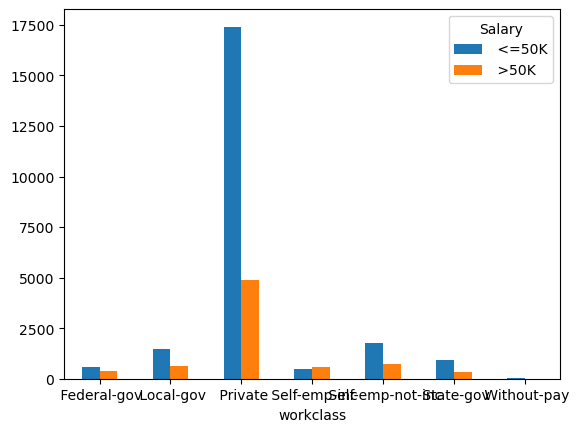

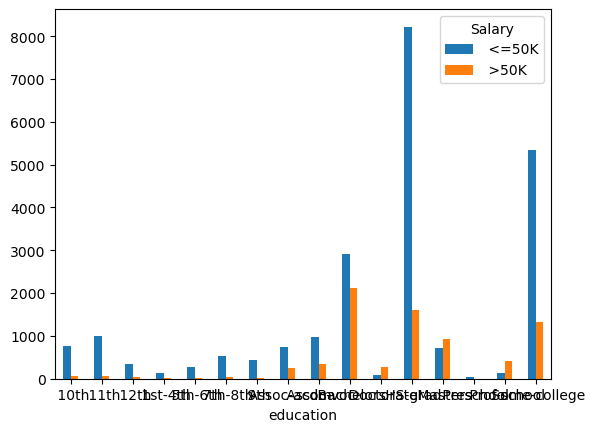

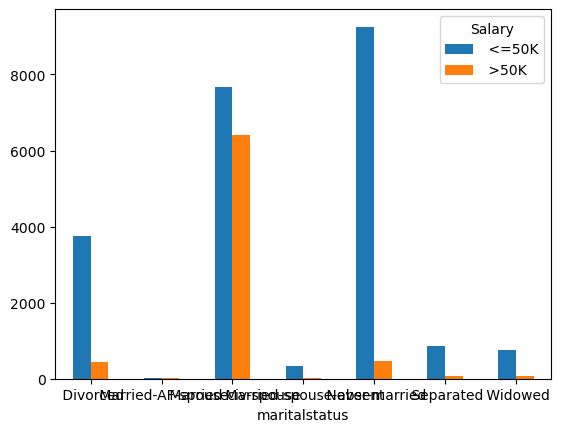

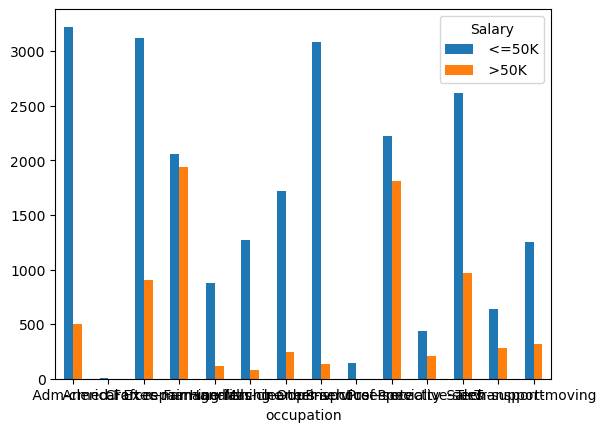

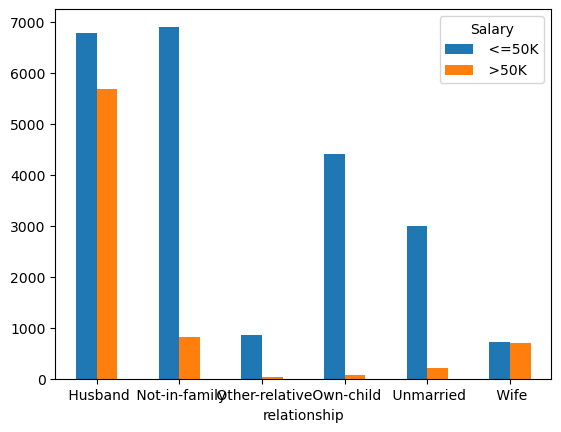

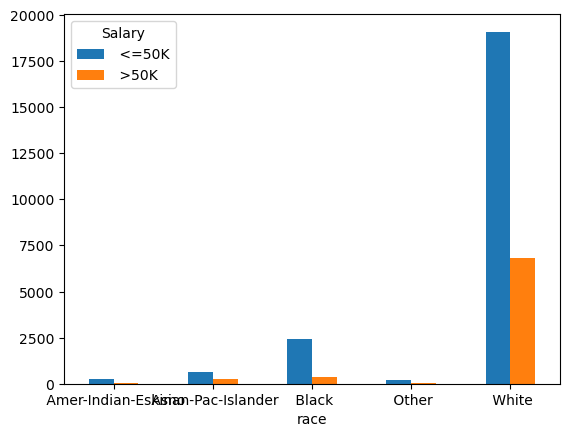

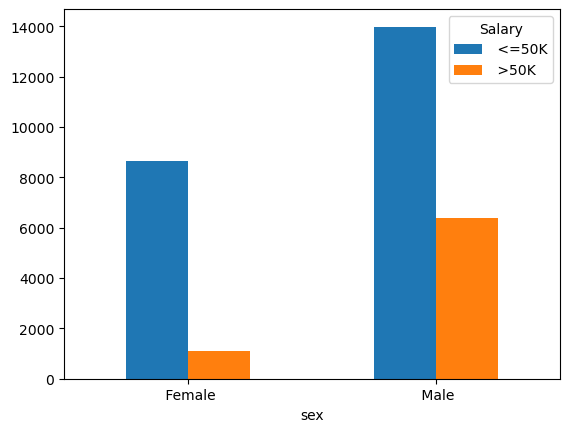

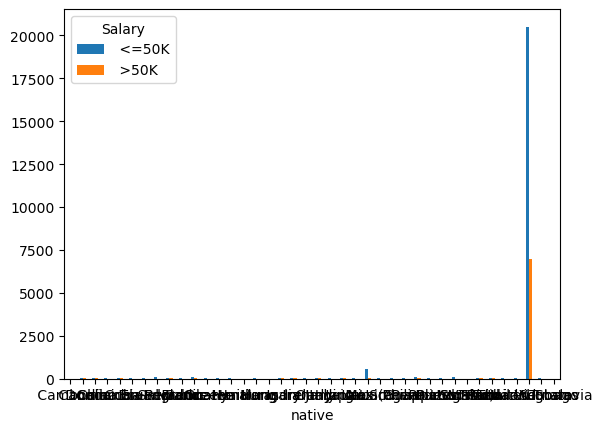

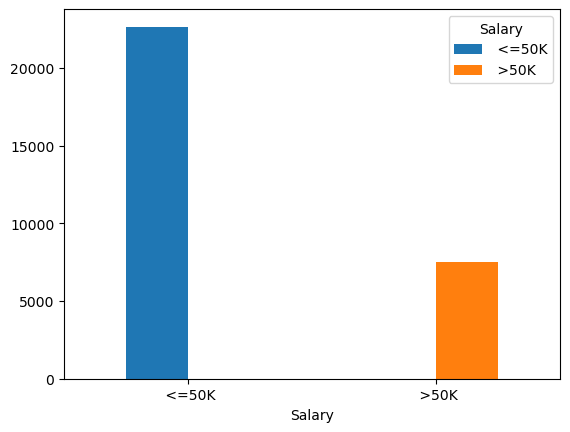

In [108]:
fig=plt.figure(figsize=(12,8))
count=1
for i in cat_col:
    fig,pd.crosstab(Train[i],Train['Salary']).plot.bar(rot=0)
    count+=1

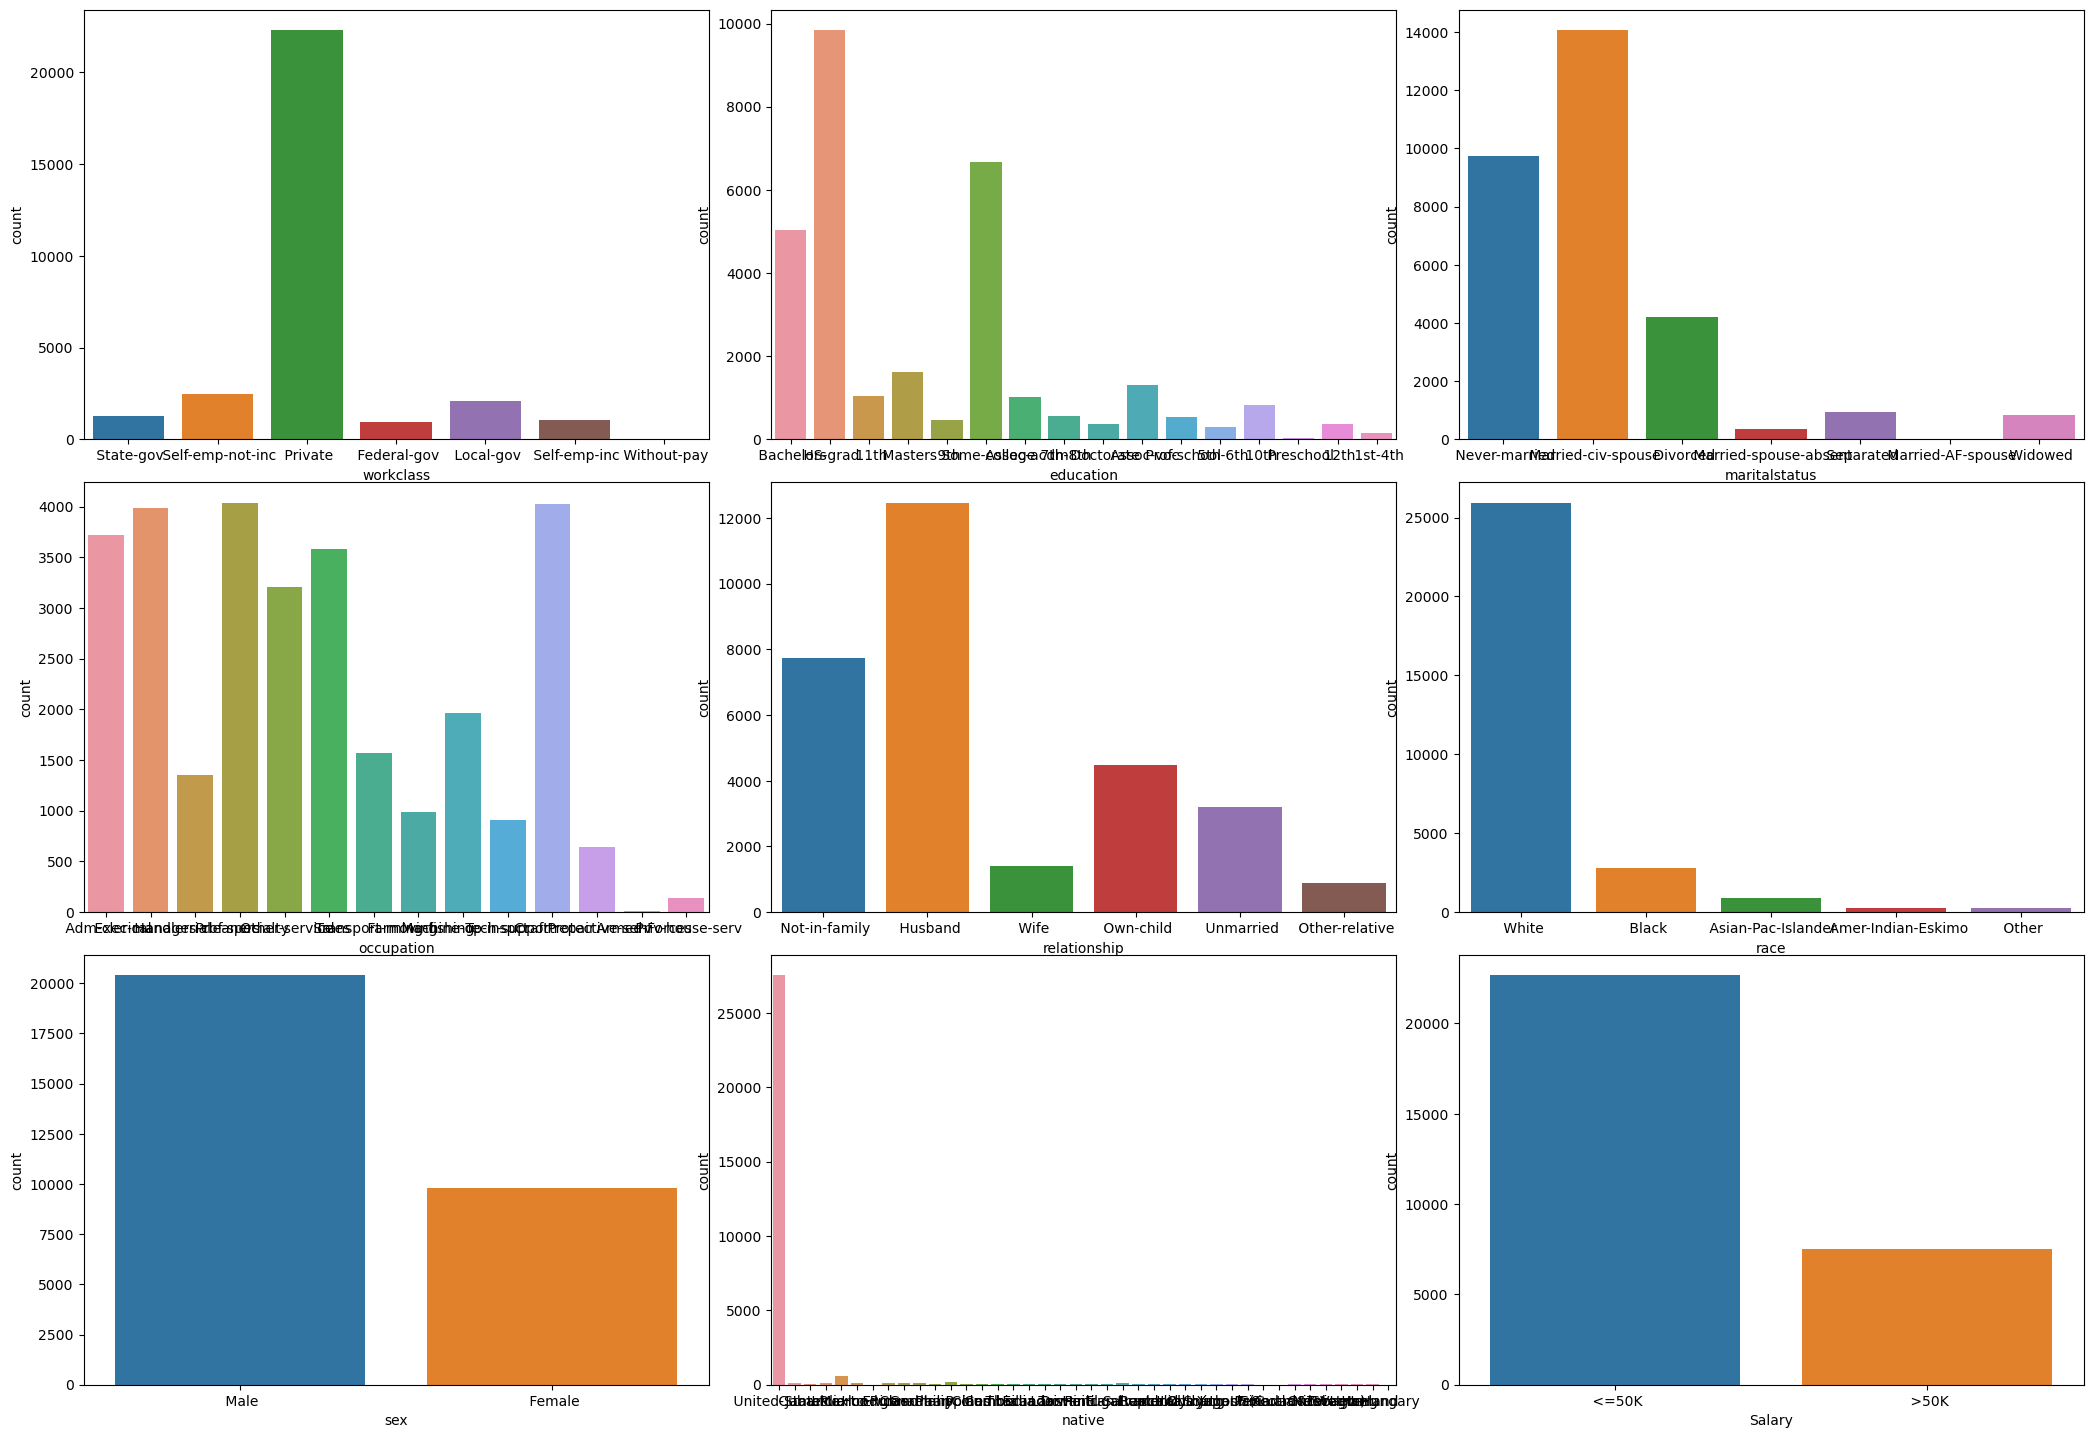

In [131]:
fig=plt.figure(figsize=(16,11))
count=1
for i in cat_col:
    plt.subplots_adjust(left=0.75,bottom=0.75,right=2,top=2, wspace=0.1,hspace=0.1)
    fig,plt.subplot(3,3,count)
    sns.countplot(Train[i])
    count+=1
plt.show()

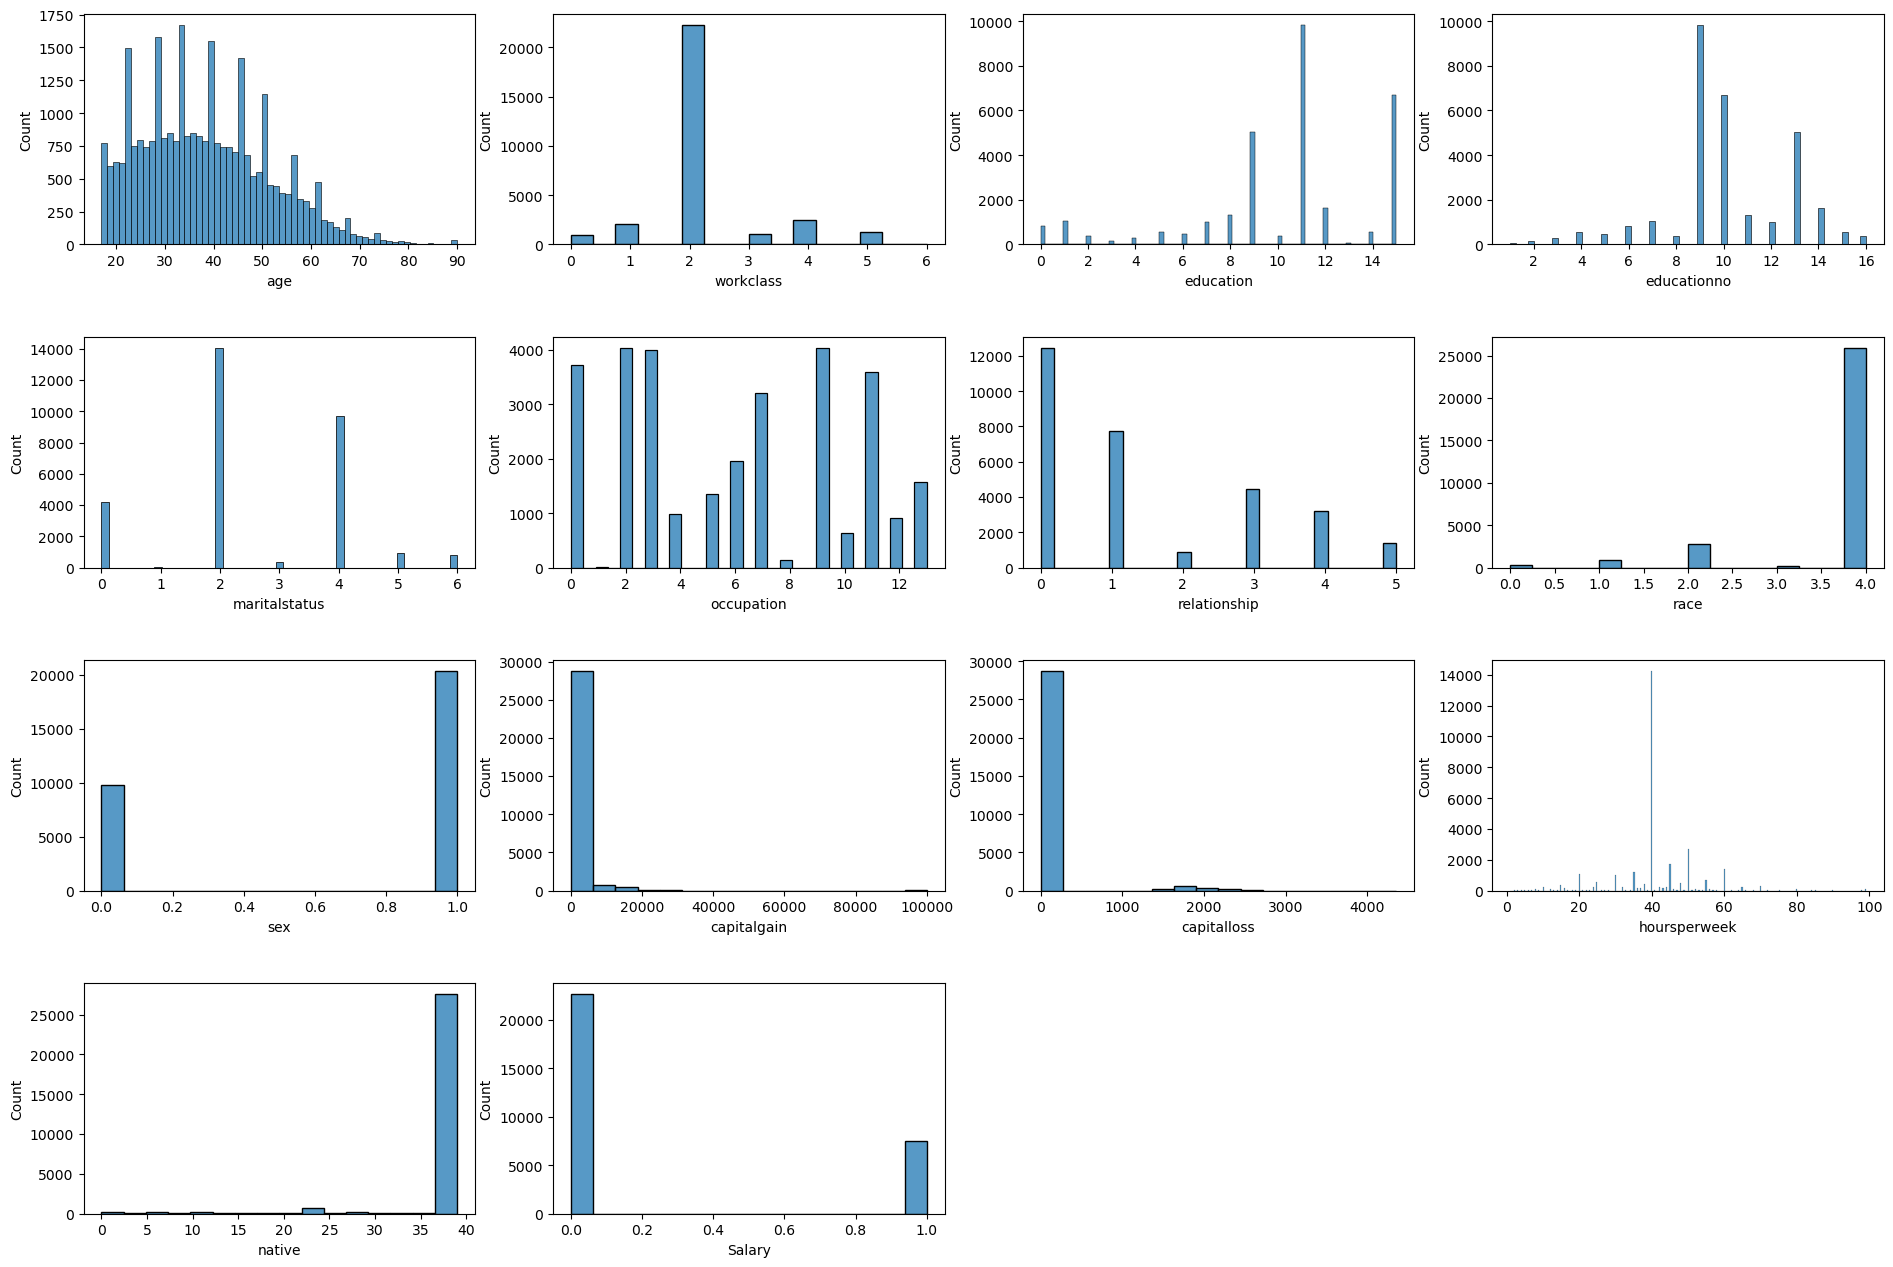

In [180]:
fig=plt.figure(figsize=(12,8))
count=1
for i in Train.columns:
    plt.subplots_adjust(left=0.5,bottom=0.5,right=2,top=2, wspace=0.2,hspace=0.4)
    fig,plt.subplot(4,4,count)
    sns.histplot(Train[i])
    count+=1

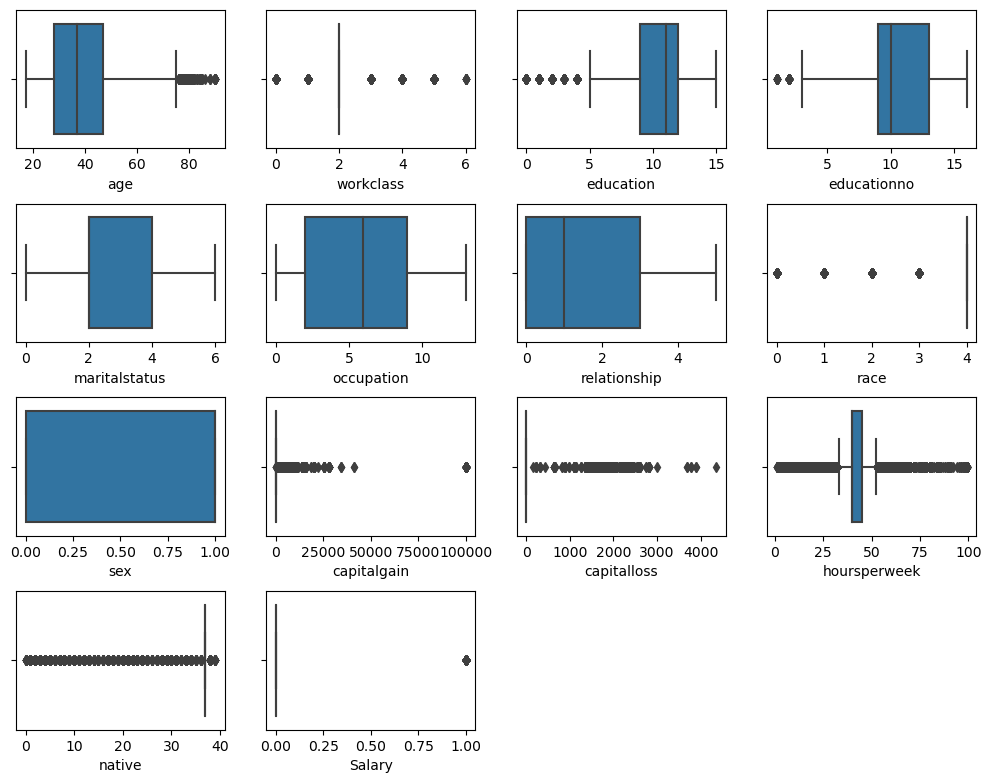

In [179]:
count=1
for i in Train.columns:
    plt.subplots_adjust(left=0.5,bottom=0.5,right=2,top=2, wspace=0.2,hspace=0.4)
    plt.subplot(4,4,count)
    sns.boxplot(Train[i])
    count+=1

# converting the categorical features into numerical

In [176]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in cat_col:
    Train[i]=lb.fit_transform(Train[i])
    Test[i]=lb.fit_transform(Test[i])

# Descriptive analysis

In [177]:
Train.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481,0.248931
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430,0.432401
min,17.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.00000,9.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.00000,11.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.00000,12.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.00000,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


# correlation analysis

In [182]:
corr=Train.corr()

<AxesSubplot:>

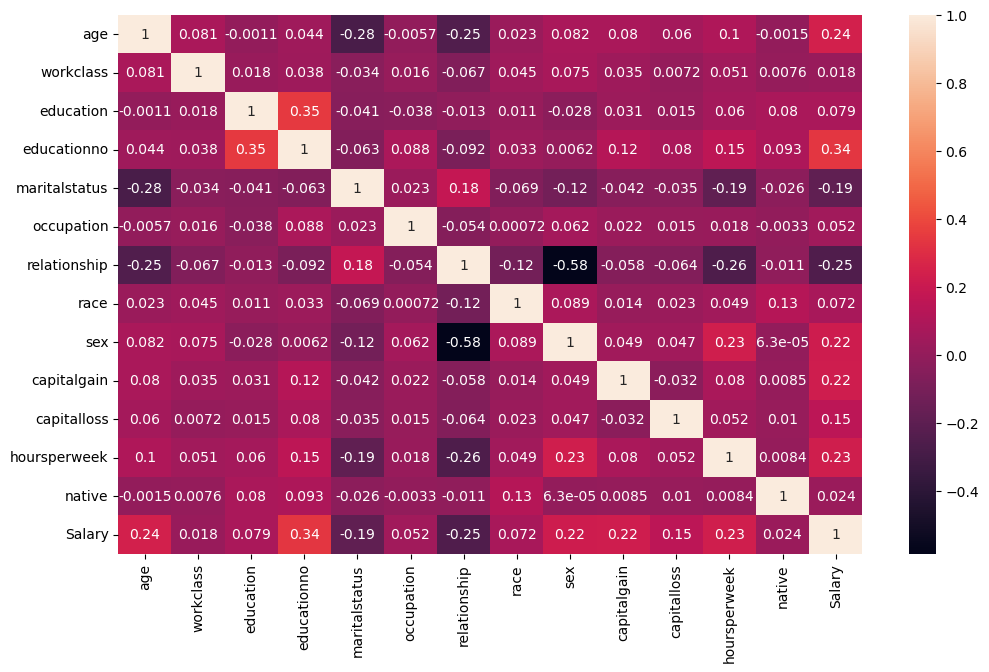

In [184]:
fig=plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)

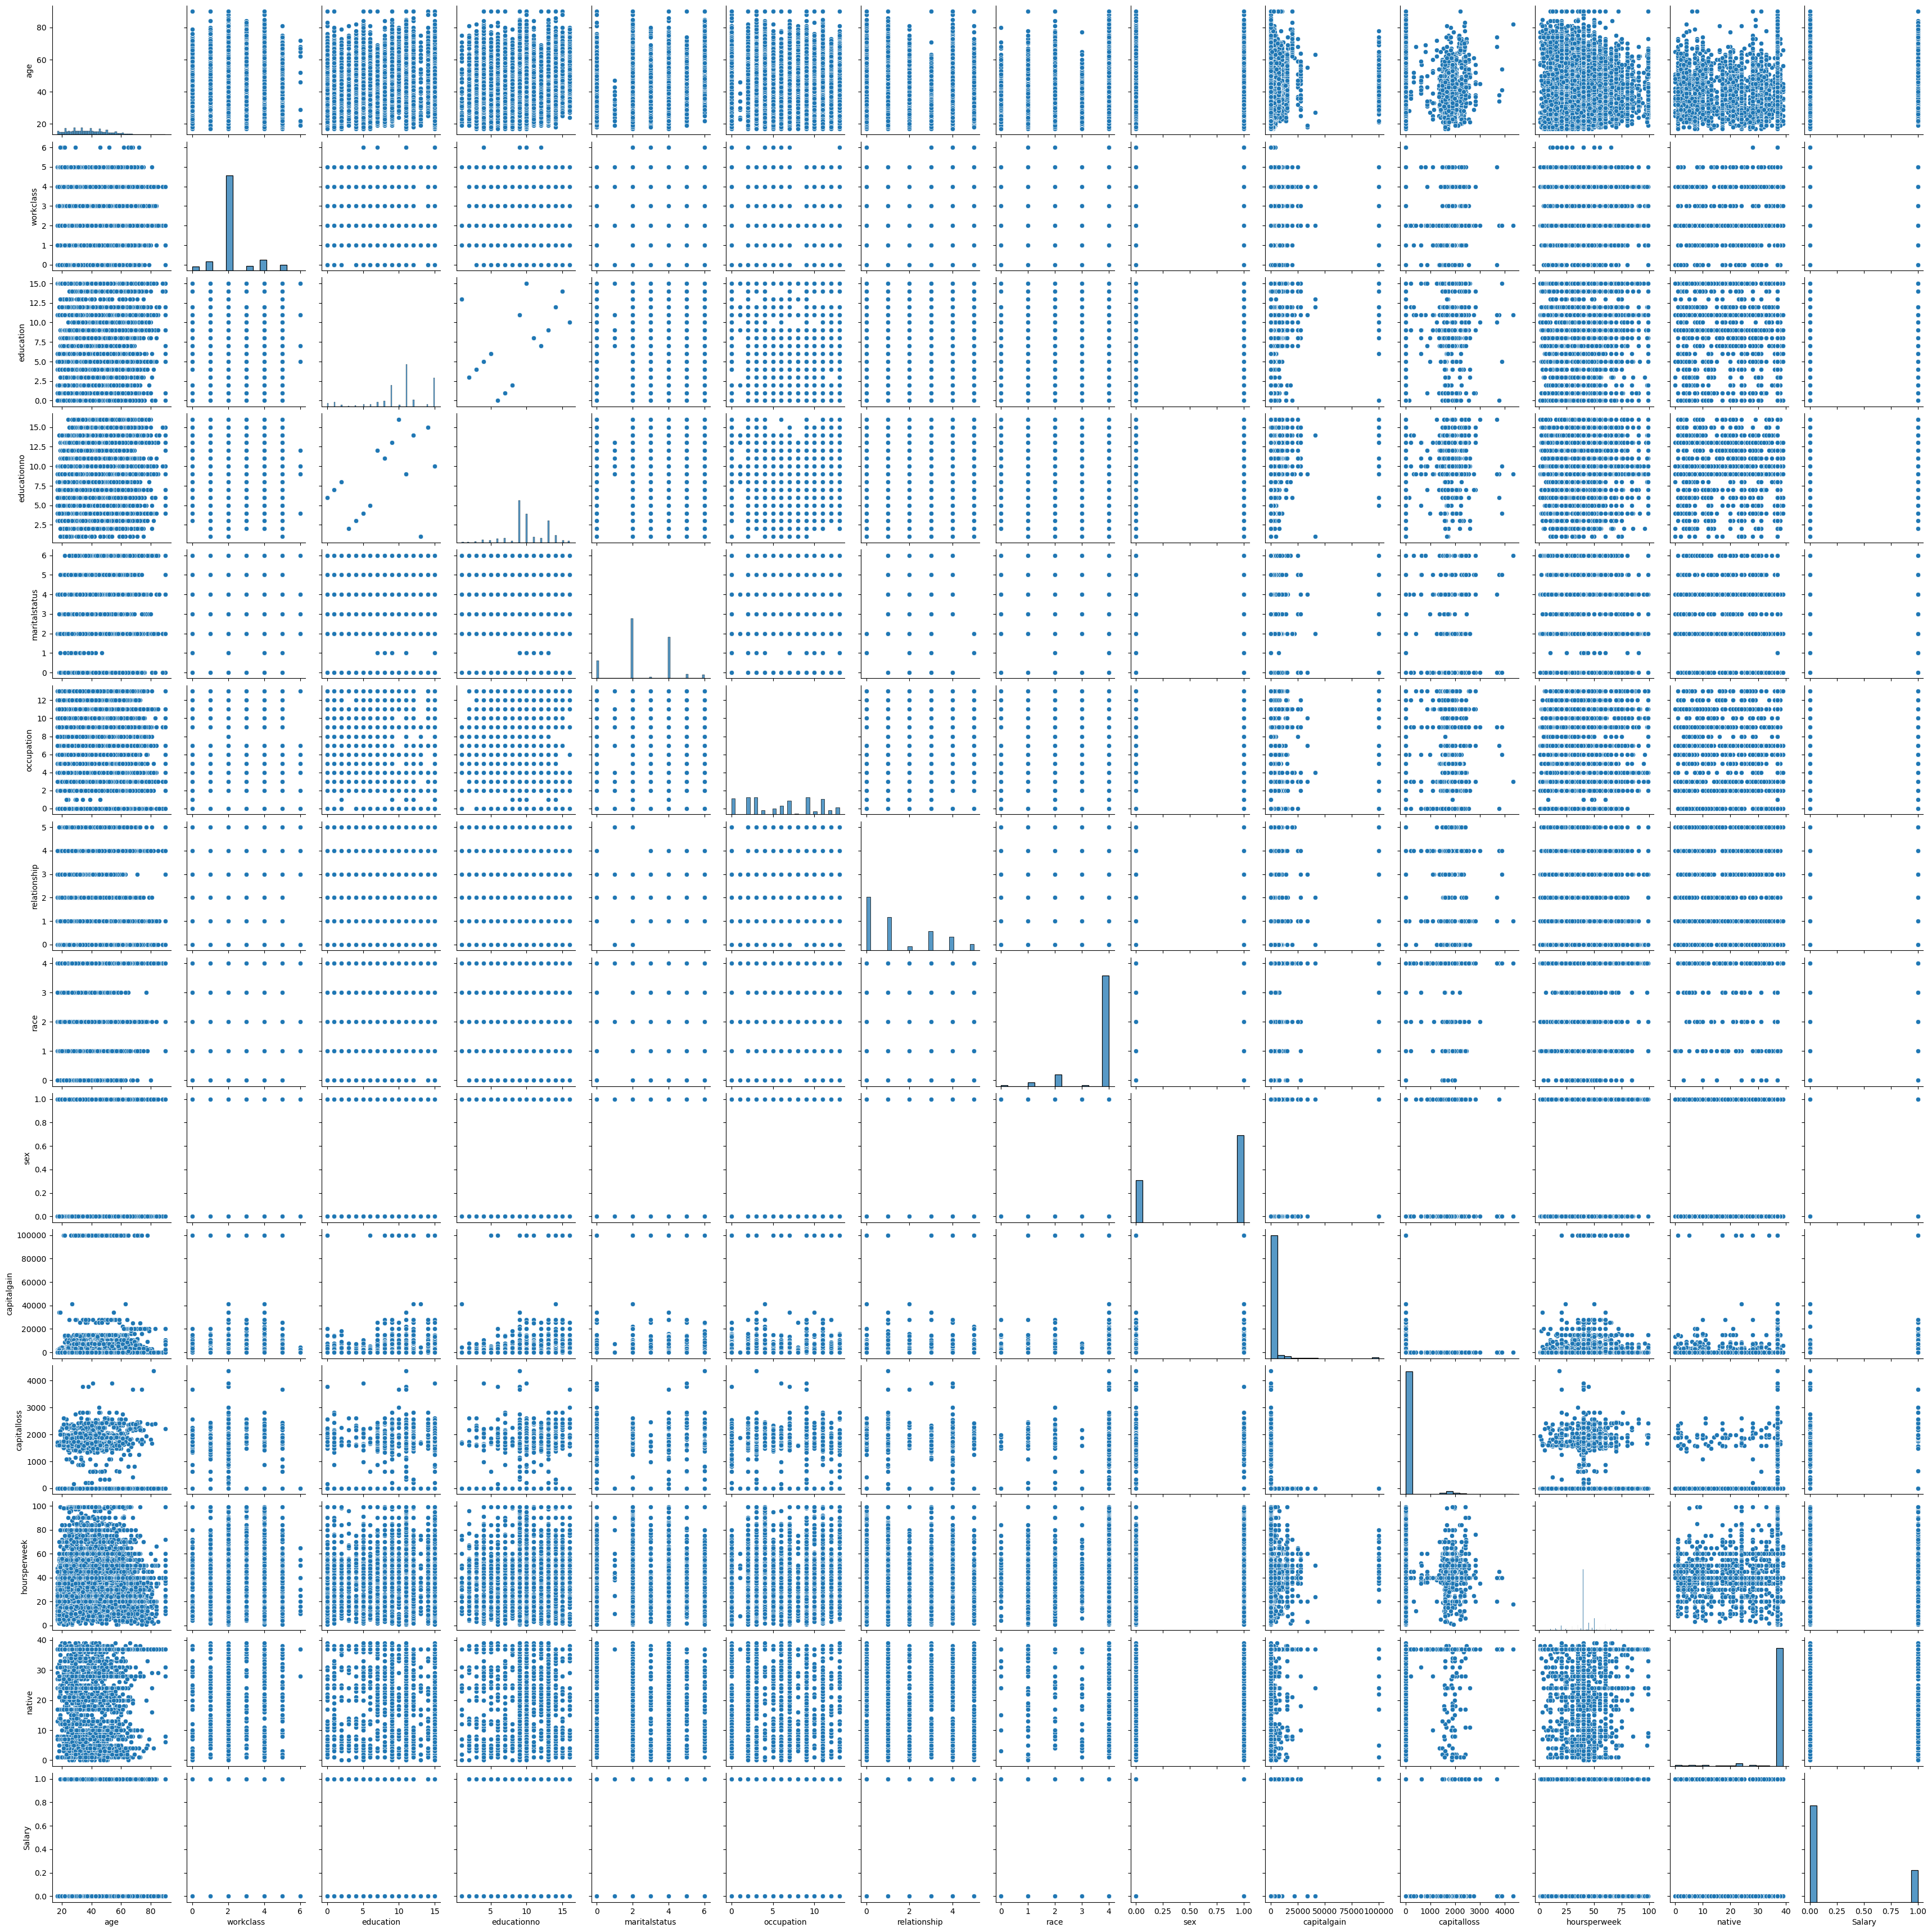

In [185]:
sns.pairplot(Train)

In [187]:
# Fetaure scaling
from sklearn.preprocessing import MinMaxScaler

In [199]:
x_train=Train.drop(columns=['Salary'])
x_test=Test.drop(columns=['Salary'])
y_train=Train.Salary
y_test=Test.Salary

In [190]:
# Feature Scaling

In [191]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [193]:
# Applying naive bayes for classification

In [214]:
model=GaussianNB()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.797586286926826

In [215]:
y_pred=model.predict(X_test)
np.mean(y_test==y_pred)

0.796812749003984

In [216]:
# model validation

In [217]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [218]:
kfold=KFold(n_splits=10)
print('cross validation score',(cross_val_score(model,X_train,y_train,cv=kfold)).mean())

cross validation score 0.797453906202606


In [219]:
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[10746,   614],
       [ 2446,  1254]], dtype=int64)

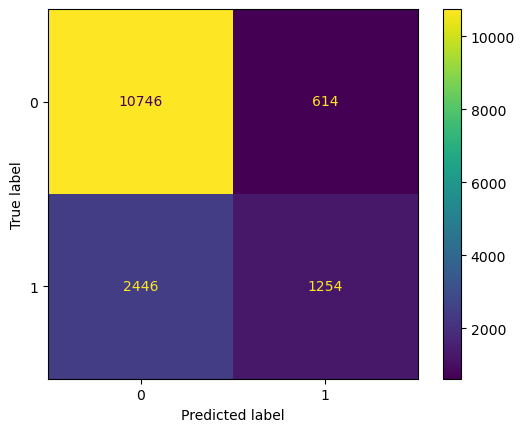

In [222]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=model.classes_)
disp.plot()
plt.show()

In [221]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11360
           1       0.67      0.34      0.45      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.80      0.77     15060



In [ ]:
# roc curve

In [ ]:
from sklearn.metrics import roc_curve,auc

0.6450364067877179


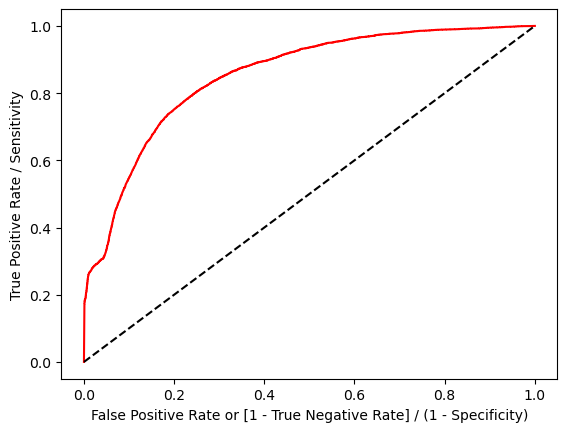

In [223]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
prediction=model.predict(X_train)
auc = roc_auc_score(y_train, prediction)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.show()

0.6424348115721354


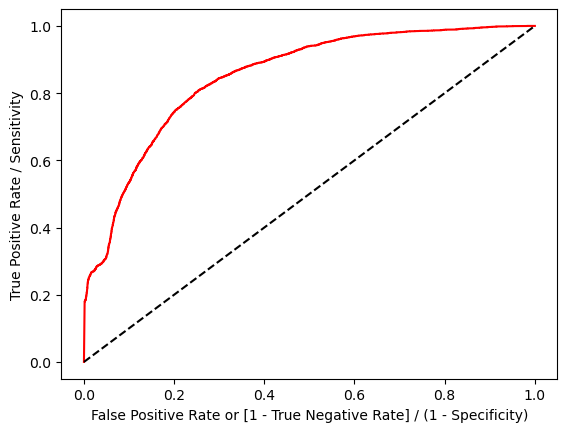

In [224]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
prediction=model.predict(X_test)
auc = roc_auc_score(y_test, prediction)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.show()

# Feature selection

In [277]:
from sklearn.feature_selection import mutual_info_classif

In [280]:
feature=mutual_info_classif(x_train,y_train)
feature

array([0.06840839, 0.0188036 , 0.06733349, 0.0638194 , 0.11241956,
       0.06595371, 0.11563721, 0.00954788, 0.02505461, 0.08010978,
       0.03305462, 0.03947064, 0.01111797])

In [284]:
feature_info=pd.Series(feature)
feature_info.index=x_train.columns
feature_info.sort_values(ascending=False)

relationship     0.115637
maritalstatus    0.112420
capitalgain      0.080110
age              0.068408
education        0.067333
occupation       0.065954
educationno      0.063819
hoursperweek     0.039471
capitalloss      0.033055
sex              0.025055
workclass        0.018804
native           0.011118
race             0.009548
dtype: float64

<AxesSubplot:>

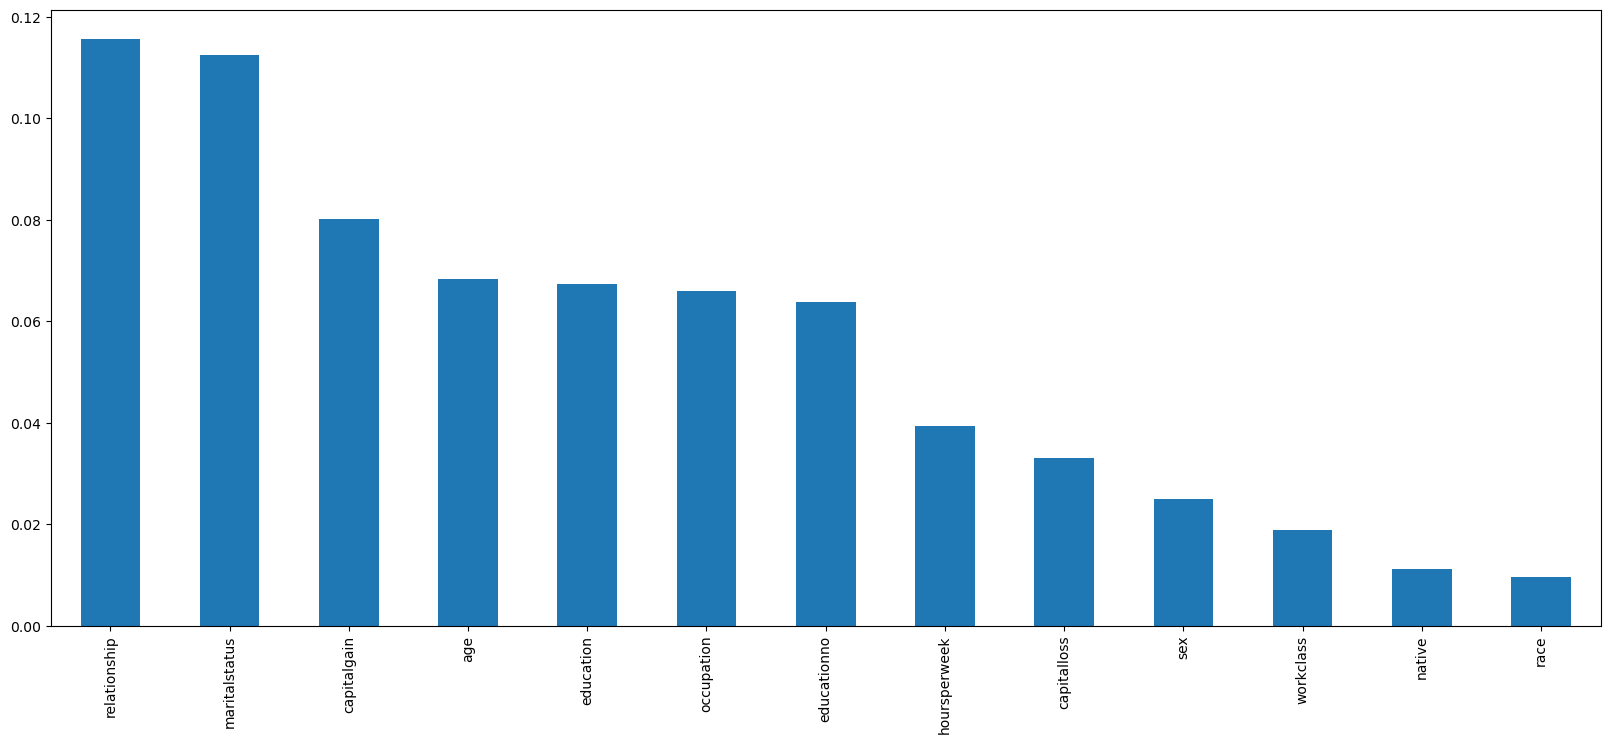

In [285]:
feature_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [295]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=8)
sel_five_cols.fit(x_train1, y_train)
x_train1.columns[sel_five_cols.get_support()]

Index(['age', 'education', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'capitalgain', 'hoursperweek'],
      dtype='object')

# Selecting the top 8 features which are significant to target variable using the selectkbest

In [296]:
colums=['age', 'education', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'capitalgain', 'hoursperweek']
x_train2=pd.DataFrame(x_train,columns=colums)
x_test2=pd.DataFrame(x_test,columns=colums)

In [297]:
scaler=MinMaxScaler()
X_train2=scaler.fit_transform(x_train2)
X_test2=scaler.fit_transform(x_test2)

# Building new model after eliminating the less significant features

In [338]:
model=GaussianNB()
model.fit(X_train2,y_train)
print('Train accuarcy:',model.score(X_train2,y_train))

Train accuarcy: 0.7909220516561122


In [340]:
y_pred=model.predict(X_test2)
print('Test accuarcy:',np.mean(y_test==y_pred))

Test accuarcy: 0.7918990703851262


# model validataion

In [300]:
kfold=KFold(n_splits=10)
print('cross validation score',(cross_val_score(model,X_train1,y_train,cv=kfold)).mean())

cross validation score 0.7846226379429037


In [301]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.75      0.23      0.35      3700

    accuracy                           0.79     15060
   macro avg       0.77      0.60      0.61     15060
weighted avg       0.78      0.79      0.75     15060



# After feature selection the accuracy hasnt been improved 